In [243]:
import pandas as pd
import matplotlib.pylab as plt
# import torch as tr
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/data_with_normed_revenue.csv')
# rev = data['norm_revenue'].values
# scale = 64 / (tr.min(rev) - tr.max(rev))  # 2^4 - 1 = 255
# A_quantized = tr.round(rev * scale)
# scale = 64/np.abs(rev).max()
# n_rev = np.round(rev * scale).astype(np.int16)

In [214]:
from talib import abstract

In [259]:
class calculate_ta_indicators:
    def __init__(self, data, fastperiod=12, slowperiod=26, signalperiod=9, rsi = 12, bollinger = 20, aroon_osc = 12):
        self.data = data
        macd = abstract.MACD(data, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
        rsi = pd.DataFrame({'rsi' : abstract.RSI(data, timeperiod=rsi)})
        bollinger = abstract.BBANDS(data, timeperiod = bollinger)
        aroon_osc = pd.DataFrame({'aroon_osc' : abstract.AROONOSC(data, n = aroon_osc)})
        hammer = pd.DataFrame({'hammer' : abstract.CDLHAMMER(data)})
        shooting_star = pd.DataFrame({'shooting_star' : abstract.CDLSHOOTINGSTAR(data)})
        evening_star = pd.DataFrame({'evening_star' : abstract.CDLEVENINGSTAR(data)})
        morning_star = pd.DataFrame({'morning_star' : abstract.CDLMORNINGSTAR(data)})
        piersing = pd.DataFrame({'piersing' : abstract.CDLPIERCING(data)})
        three_white_soldiers = pd.DataFrame({'three_white_soldiers' : abstract.CDL3WHITESOLDIERS(data)})
        three_black_crowns = pd.DataFrame({'three_black_crowns' : abstract.CDL3BLACKCROWS(data)})
        hanging_man = pd.DataFrame({'hanging_man' : abstract.CDLHANGINGMAN(data)})
        dark_cloud_clover = pd.DataFrame({'dark_cloud_clover' : abstract.CDLDARKCLOUDCOVER(data)})
        macd['time'] = data['time']
        rsi['time'] = data['time']
        bollinger['time'] = data['time']
        aroon_osc['time'] = data['time']
        hammer['time'] = data['time']
        shooting_star['time'] = data['time']
        evening_star['time'] = data['time']
        morning_star['time'] = data['time']
        piersing['time'] = data['time']
        three_white_soldiers['time'] = data['time']
        three_black_crowns['time'] = data['time']
        hanging_man['time'] = data['time']
        dark_cloud_clover['time'] = data['time']
        self.atribute = {
            'macd':macd,
            'rsi':rsi,
            'bollinger':bollinger,
            'aroon_osc':aroon_osc,
            'hammer':hammer,
            'shooting_star':shooting_star,
            'evening_star':evening_star,
            'morning_star':morning_star,
            'piersing':piersing,
            'three_white_soldiers':three_white_soldiers,
            'three_black_crowns':three_black_crowns,
            'hanging_man':hanging_man,
            'dark_cloud_clover':dark_cloud_clover}
    def all_data(self):
        data = pd.DataFrame(self.data['time'])
        for k,i in self.atribute.items():
            data = data.merge(i,on='time')
        return data

In [260]:
data['time'] = pd.to_datetime(data['time'])
ind = calculate_ta_indicators(data)

In [261]:
df = ind.all_data()

In [263]:
data = data.merge(df,on='time')

In [267]:
for k,i in data.corr(numeric_only=True)['class'].items():
    if np.isnan(i):
        data = data.drop(columns=k)

In [274]:
data['date']

0       2023-01-01
1       2023-01-01
2       2023-01-01
3       2023-01-01
4       2023-01-01
           ...    
6985    2023-10-19
6986    2023-10-19
6987    2023-10-19
6988    2023-10-19
6989    2023-10-19
Name: date, Length: 6990, dtype: object

In [275]:
data.corr(numeric_only=True)

,open,high,low,close,volume,turnover,class,norm_revenue,macd,macdsignal,macdhist,rsi,upperband,middleband,lowerband,aroon_osc,hammer,three_white_soldiers,hanging_man
open,1.000000,0.999500,0.999429,0.999324,0.036823,0.111600,-0.006377,0.014721,0.007058,0.011684,-0.014324,-0.064987,0.994281,0.996530,0.991171,-0.031202,-0.011140,0.022488,-0.025117
high,0.999500,1.000000,0.999000,0.999584,0.056007,0.130541,-0.015594,0.015985,0.012877,0.016196,-0.008870,-0.054179,0.994168,0.995751,0.989732,-0.025829,-0.014668,0.022590,-0.023211
low,0.999429,0.999000,1.000000,0.999570,0.018925,0.094086,-0.015700,0.018094,0.005555,0.008468,-0.008823,-0.057481,0.993138,0.996083,0.991423,-0.027177,-0.011774,0.022984,-0.025742
close,0.999324,0.999584,0.999570,1.000000,0.037227,0.111902,-0.022371,0.017932,0.010132,0.012865,-0.007389,-0.051435,0.993715,0.995921,0.990523,-0.026161,-0.011764,0.023175,-0.025747
volume,0.036823,0.056007,0.018925,0.037227,1.000000,0.993107,-0.003177,-0.076653,0.134860,0.130676,0.038444,0.090105,0.047461,0.023667,-0.000342,0.047630,-0.043340,-0.006850,0.048080
turnover,0.111600,0.130541,0.094086,0.111902,0.993107,1.000000,-0.005012,-0.071795,0.134968,0.130529,0.039325,0.087729,0.121408,0.098569,0.074943,0.046790,-0.042320,-0.005393,0.046512
class,-0.006377,-0.015594,-0.015700,-0.022371,-0.003177,-0.005012,1.000000,-0.023399,-0.055967,-0.017349,-0.140324,-0.275645,-0.002478,-0.001786,-0.001080,-0.122265,0.027347,-0.028357,0.059585
norm_revenue,0.014721,0.015985,0.018094,0.017932,-0.076653,-0.071795,-0.023399,1.000000,0.084037,0.054732,0.113987,0.155242,0.003820,0.006101,0.008338,0.072926,-0.029740,0.002422,0.014228
macd,0.007058,0.012877,0.005555,0.010132,0.134860,0.134968,-0.055967,0.084037,1.000000,0.959622,0.316609,0.758819,-0.031061,-0.058446,-0.085394,0.467546,-0.002749,-0.000594,0.002820
macdsignal,0.011684,0.016196,0.008468,0.012865,0.130676,0.130529,-0.017349,0.054732,0.959622,1.000000,0.037005,0.619933,-0.010079,-0.037681,-0.065007,0.330914,-0.001801,-0.001368,-0.008028


In [217]:
ind = calculate_ta_indicators(data)

In [55]:
data['time'] = pd.to_datetime(data['time'])

In [312]:
data = data.dropna()
data = data.drop(columns=['hammer','three_white_soldiers','hanging_man'])

In [388]:
# x = data[['time','close','high','low','norm_revenue']]
# y = n_rev
x_train,x_test,y_train,y_test = train_test_split(data.drop(columns=['norm_revenue','time','date','class']),data['norm_revenue'].values,test_size=0.3,shuffle=True)

In [398]:
import lightgbm as lgb
# x = data[['time','close','high','low','class','norm_revenue']]
# data = data.drop(columns='date')
# x_train,x_test,y_train,y_test = train_test_split(data.drop(columns=['norm_revenue','open']),data['norm_revenue'].values,test_size=0.3,shuffle=True)
# train_data = Pool(x_train,label=y_train)
# val_data = Pool(x_test, label=y_test)
train_data_bench = lgb.Dataset(x_train,label=y_train)
val_data_bench = lgb.Dataset(x_test, label=y_test)

In [399]:
m = lgb.train({'boosting': 'gbrt',
 'objective': 'regression',
 'metric': ['RMSE','mean_averege_error'],
 'device_type': 'cpu',
 'data_sample_strategy': 'bagging',
 'num_iterations': 9000,
 'learning_rate': 0.001,
 'num_leaves': 60,
 'max_bins':526,
 'num_threads': 16, 'max_depth': -1,
 'min_data_in_leaf': 20,
 'bagging_seed': 11,
 'verbosity': 2,
 'alpha': 0.3,
 'num_trees':10000,
 'time_out': 220},train_data_bench,
                valid_sets=val_data_bench,
                categorical_feature='auto')

/home/sch/miniconda3/envs/first/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/sch/miniconda3/envs/first/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.002215
[LightGBM] [Debug] init for col-wise cost 0.000003 seconds, init for row-wise cost 0.000197 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6867
[LightGBM] [Info] Number of data points in the train set: 4869, number of used features: 14
[LightGBM] [Info] Start training from score -0.944796
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 60 and depth = 14
[LightGBM] [Debug] 

In [400]:
from sklearn.metrics import r2_score, mean_absolute_error,accuracy_score,recall_score
i = m.predict(x_test)
print(f'LGD\n R2:{r2_score(y_test,i)}, MAE:{mean_absolute_error(y_test,i)}')
print(f'Class\n Accuracy:{accuracy_score(np.sign(y_test),np.sign(i))}, Recall:{recall_score(np.sign(y_test),np.sign(i),average="macro")}')

LGD
 R2:-0.1273723558341917, MAE:3.1011617252453587
Class
 Accuracy:0.5775862068965517, Recall:0.46482033049445964


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

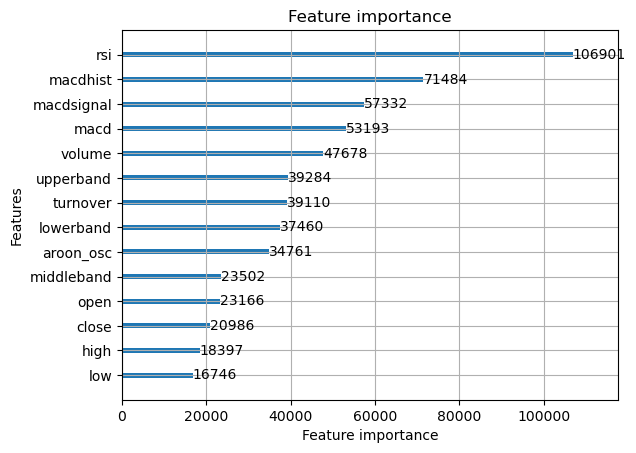

In [401]:
lgb.plot_importance(m)

In [318]:
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

In [340]:
mlb = MultiLabelBinarizer()
x_train,x_test,y_train,y_test = train_test_split(data.drop(columns=['norm_revenue','time','date']),data['norm_revenue'].values,test_size=0.3,shuffle=True)
y_train_ = mlb.fit_transform(x_train['class'].values.reshape(-1,1))
x_train = x_train.drop(columns='class')
y_test_ = mlb.fit_transform(x_test['class'].values.reshape(-1,1))
x_test = x_test.drop(columns='class')
# mlb.fit(y_train.reshape(-1,1))
# y_k_hot = mlb.transform(y)
model = CatBoostClassifier(iterations=1_000,depth=12,random_seed=5,learning_rate=0.01,loss_function='MultiClass',border_count=None,eval_metric='Accuracy',grow_policy='Lossguide',)

ovr = OneVsRestClassifier(estimator=model)
# ovr.fit(X,y_k_hot)

In [341]:
ovr = ovr.fit(x_train,y_train_)

0:	learn: 0.8377490	total: 4.96ms	remaining: 4.96s
1:	learn: 0.8377490	total: 10.1ms	remaining: 5.04s
2:	learn: 0.8377490	total: 14.3ms	remaining: 4.76s
3:	learn: 0.8377490	total: 18.6ms	remaining: 4.62s
4:	learn: 0.8377490	total: 22ms	remaining: 4.38s
5:	learn: 0.8377490	total: 25.4ms	remaining: 4.2s
6:	learn: 0.8377490	total: 28.1ms	remaining: 3.99s
7:	learn: 0.8377490	total: 31.1ms	remaining: 3.85s
8:	learn: 0.8377490	total: 33.7ms	remaining: 3.71s
9:	learn: 0.8377490	total: 36.1ms	remaining: 3.57s
10:	learn: 0.8377490	total: 38.5ms	remaining: 3.47s
11:	learn: 0.8377490	total: 40.9ms	remaining: 3.37s
12:	learn: 0.8377490	total: 43ms	remaining: 3.27s
13:	learn: 0.8377490	total: 45.7ms	remaining: 3.22s
14:	learn: 0.8377490	total: 49.3ms	remaining: 3.23s
15:	learn: 0.8377490	total: 51.6ms	remaining: 3.17s
16:	learn: 0.8377490	total: 54ms	remaining: 3.12s
17:	learn: 0.8377490	total: 56.4ms	remaining: 3.08s
18:	learn: 0.8377490	total: 58.7ms	remaining: 3.03s
19:	learn: 0.8377490	total: 6

In [387]:
print(f'Class\n Accuracy:{accuracy_score(np.sign(y_test)+1,ovr.predict_proba(x_test).argmax(1))}, Recall:{recall_score(np.sign(y_test)+1,ovr.predict_proba(x_test).argmax(1),average="macro")}')

Class
 Accuracy:0.15517241379310345, Recall:0.3326005599046846


In [156]:
# x = data[['time','close','high','low','class','norm_revenue']]
data = data.drop(columns='date')
x_train,x_test,y_train,y_test = train_test_split(data.drop(columns='norm_revenue'),data['norm_revenue'].values,test_size=0.3,shuffle=True)
train_data = Pool(x_train,label=y_train)
val_data = Pool(x_test, label=y_test)

In [126]:
model = CatBoostRegressor(iterations=10_000,depth=10,random_seed=5,learning_rate=0.01,loss_function='MAPE',eval_metric='R2',grow_policy='Lossguide',)
mode = model.fit(train_data,eval_set=val_data,use_best_model=True,verbose_eval=True)

0:	learn: -0.0037107	test: -0.0087616	best: -0.0087616 (0)	total: 1.75ms	remaining: 17.5s
1:	learn: -0.0037107	test: -0.0087616	best: -0.0087616 (0)	total: 3.89ms	remaining: 19.4s
2:	learn: -0.0037107	test: -0.0087616	best: -0.0087616 (0)	total: 6.74ms	remaining: 22.5s
3:	learn: -0.0004290	test: -0.0088474	best: -0.0087616 (0)	total: 9.18ms	remaining: 22.9s
4:	learn: -0.0004290	test: -0.0088474	best: -0.0087616 (0)	total: 12.6ms	remaining: 25.2s
5:	learn: -0.0004290	test: -0.0088474	best: -0.0087616 (0)	total: 14.9ms	remaining: 24.9s
6:	learn: -0.0004290	test: -0.0088474	best: -0.0087616 (0)	total: 16.9ms	remaining: 24.1s
7:	learn: 0.0059069	test: -0.0002398	best: -0.0002398 (7)	total: 19ms	remaining: 23.8s
8:	learn: 0.0059069	test: -0.0002398	best: -0.0002398 (7)	total: 21.1ms	remaining: 23.4s
9:	learn: 0.0059069	test: -0.0002398	best: -0.0002398 (7)	total: 21.8ms	remaining: 21.8s
10:	learn: 0.0059069	test: -0.0002398	best: -0.0002398 (7)	total: 24ms	remaining: 21.8s
11:	learn: 0.0059

# Old

In [31]:
import tensorflow as tf
# first layer
learn_rate = 0.0001
batch_size_ = 32
num_epochs = 15
# Define the inputs of the Model
seq_len = 12
num_channels = 1
num_classes = 64
inputs = tf.placeholder(tf.float32, [None, seq_len, num_channels])
labels = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32)
learning_rate_ = tf.placeholder(tf.float32)
conv1 = tf.layers.conv1d(inputs, filters=18, kernel_size=2,
                         strides=1, padding='SAME', activation=tf.nn.relu)
max_pool1 = tf.layers.max_pooling1d(
    conv1, pool_size=2, strides=2, padding='SAME')
# second layer
conv2 = tf.layers.conv1d(max_pool1, filters=36, kernel_size=2,
                         strides=1, padding='SAME', activation=tf.nn.relu)
max_pool2 = tf.layers.max_pooling1d(
    conv2, pool_size=2, strides=2, padding='SAME')
# second layer
conv3 = tf.layers.conv1d(max_pool2, filters=72, kernel_size=2,
                         strides=1, padding='SAME', activation=tf.nn.relu)
max_pool3 = tf.layers.max_pooling1d(
    conv3, pool_size=2, strides=2, padding='SAME')
# second layer
conv4 = tf.layers.conv1d(max_pool3, filters=144, kernel_size=2,
                         strides=1, padding='SAME', activation=tf.nn.relu)
max_pool4 = tf.layers.max_pooling1d(
    conv4, pool_size=2, strides=2, padding='SAME')
# Size of the last layer should be 8*144
flat = tf.reshape(max_pool4, [-1, 8*144])
flat_d = tf.nn.dropout(flat, keep_prob)
# predictions
logits = tf.layers.dense(flat_d, num_classes, activation=tf.nn.relu)
# Cost function and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
# cost = -tf.reduce_sum(labels*tf.log(logits + 1e-10))
train_step = tf.train.AdamOptimizer(learning_rate_).minimize(cost)
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [77]:
import numpy as np
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in np.arange(num_epochs):
    bx,by = load_batch(trainX,trainY,batch_size_)
    sess.run(train_step,feed_dict={inputs:bx,labels:by,keep_prob:0.5,learning_rate_:learn_rate})
    print("Epoch: %d"%(e))
    print(sess.run(cost,feed_dict={inputs:bx,labels:by,keep_prob:0.5,learning_rate_:learn_rate}))
acc = sess.run(accuracy,feed_dict={inputs:testX,labels:testY,keep_prob:1.0,learning_rate_:learn_rate})
print("----------\nAccuracy:%.3f"%(acc))

torch.Size([2097, 4])

In [24]:
import tensorflow as tf
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('norm_revenue')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [11]:
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
train

In [25]:
batch_size = 32
train_ds = df_to_dataset(x_train, batch_size=batch_size)
test_ds = df_to_dataset(x_test, shuffle=False, batch_size=batch_size)

In [27]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of ages:', feature_batch['close'])
  print('A batch of targets:', label_batch )

Every feature: ['close', 'high', 'low', 'volume']
A batch of ages: tf.Tensor(
[21310.87 28517.29 23195.87 27400.78 30274.01 29981.1  21195.7  16693.09
 27153.63 30570.52 27934.62 24366.99 23576.71 27617.61 26701.93 27503.47
 22930.01 24875.   29926.5  16661.4  23052.48 21222.96 23081.55 28018.91
 27882.27 28871.73 27163.68 30571.99 28318.77 28023.61 27802.   30566.99], shape=(32,), dtype=float64)
A batch of targets: tf.Tensor(
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0], shape=(32,), dtype=int16)


2024-03-17 21:44:58.048964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
from tensorflow import feature_column
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [30]:
model = tf.keras.Sequential([
    feature_column,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          epochs=10)

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <module 'tensorflow._api.v2.feature_column' from '/home/sch/miniconda3/envs/test/lib/python3.11/site-packages/tensorflow/_api/v2/feature_column/__init__.py'> (of type <class 'module'>)

In [76]:
device = tr.device("cuda" if tr.cuda.is_available() else "cpu")

In [84]:
x_train.shape[0]//16

305

In [128]:
def collate_fn(batch):
    # A data tuple has the form:
    # waveform, sample_rate, label, speaker_id, utterance_number
    tensors = []
    targets = []
    for _ in batch:
        waveform, label = _[:-1], _[-1]
        tensors += [waveform]
        targets += [label]

    # Group the list of tensors into a batched tensor
    tensors = tr.stack(tensors)
    targets = tr.stack(targets)

    # Gather in lists, and encode labels as indices

    return tensors, targets

train_loader = tr.utils.data.DataLoader(
    x_train,
    batch_size=32,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=1
)
test_loader = tr.utils.data.DataLoader(
    x_test,
    batch_size=32,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=1,
)

In [111]:
class Net(tr.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = tr.nn.Linear(32, 4)
        self.fc2 = tr.nn.Linear(120, 84)
        self.fc3 = tr.nn.Linear(84, 10)
    def forward(self, x):
        x = tr.flatten(x, 1) # flatten all dimensions except batch
        x = tr.functional.F.relu(self.fc1(x))
        x = tr.functional.F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = tr.nn.L1Loss()
optimizer = tr.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [87]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        output = model(data)

        # negative log-likelihood for a tensor of size (batch x 1 x n_output)
        loss = tr.functional.F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        # update progress bar
        pbar.update(pbar_update)
        # record loss
        losses.append(loss.item())

In [88]:
net

Net(
  (conv1): Conv2d(4, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [89]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)

def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

In [129]:
from tqdm import tqdm
pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

# The transform needs to live on the same device as the model and the data.
with tqdm(total=6) as pbar:
    for epoch in range(1, 2 + 1):
        train(net, epoch, 2)
        test(net, epoch)

  0%|          | 0/6 [00:00<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/sch/miniconda3/envs/test/lib/python3.11/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/sch/miniconda3/envs/test/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sch/miniconda3/envs/test/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
RuntimeError: CUDA error: initialization error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [133]:
y_train.to('cuda')

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0', dtype=torch.int16)

In [136]:
x_train.T@y_train.to('cuda')

RuntimeError: expected scalar type Float but found Short

In [122]:
tr.from_numpy(x_train).to(device)

TypeError: expected np.ndarray (got Tensor)